In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!ls
!pwd

data.csv  drive  sample_data  stopwords_bangla.csv
/content


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import pickle
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from  keras . utils  import  to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D,Conv2D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from keras.initializers import Constant
from keras.layers import Embedding

from pandas import DataFrame
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



In [ ]:
# !git clone -l -s https://github.com/banglakit/bengali-stemmer.git

In [ ]:
# !pip install git+https://github.com/banglakit/bengali-stemmer.git 

In [ ]:
# !pip install BnVec
# !git clone https://github.com/banglakit/bengali-stemmer.git
!python -m pip install --upgrade pip
%cd bengali-stemmer
!pip install flake8

In [ ]:
from pandas import DataFrame
from BnVec import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
# from bengali_stemmer.rafikamal2014 import RafiStemmer
# stemmer = RafiStemmer()
# stemmer.stem_word('বাংলায়')

'বাংলা'

In [ ]:
path = '/content/drive/My Drive/'


In [ ]:
df = pd.read_csv('/content/data.csv')
stop_words = pd.read_csv('/content/stopwords_bangla.csv')


In [ ]:
len(set(df['meaning']))

529

In [ ]:
df = df.drop(['Unnamed: 3'] , axis=1)


In [ ]:
texts = list(df['Text'])

In [ ]:
label = list(df['meaning'])

In [ ]:
macronum=sorted(set(df['meaning']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

df['meaning']=df['meaning'].apply(fun)

In [ ]:
label = list(df['meaning'])

In [ ]:
max(label)

528

# Total no. of class 529 (sense) 

In [ ]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
  #  cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned1)
    return cleaned1

In [ ]:
# stop_words
set_stop = set(stop_words['Words'])

In [ ]:
len(set_stop)

398

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []
        for w in str(sentence).split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                   # print(cleaned_word)
                    if((cleaned_word) not in set_stop):
                        # s = stemmer.stem_word(cleaned_word)
                        s = cleaned_word
                        #print(s)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
# append the ambiguous word at last
# for i in range(len(ambi_word)):
#     ambi_word[i] = str(ambi_word[i])

for i in range(len(texts)):
  texts[i] = texts[i] + " " + df['ambiguous_word'][i]

In [ ]:
import re
re.compile('<title>(.*)</title>')
texts = pre_process(texts)

In [ ]:
texts

In [ ]:

x = texts

In [ ]:
total_texts = pre_process(texts)

In [ ]:

def get_embedding_vectors(word_index, embedding_size=100):
    embeddingsIndex = {}
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_size))
    with open(f"/content/drive/MyDrive/bn_glove.39M.100d.txt") as f:
        for line in tqdm(f, "Reading GloVe"):
            values = line.split(' ')
           # print(values)
            word = values[0]
            embeddingVector = np.array([float(val) for val in values[1:]])
            embeddingsIndex[word] = embeddingVector
    embeddingMatrix = np.zeros((len(word_index) + 1, 100))
    for word, i in word_index.items():
        embeddingVector = embeddingsIndex.get(word)
        if embeddingVector is not None:
            # words not found in embedding index will be all-zeros.
            embeddingMatrix[i] = embeddingVector
    
    return embeddingMatrix 
 

# MAx Unique word

In [ ]:
words = []
count = 0
for line in total_texts:
  sen = line.split()
  for word in sen:
    # print(word)
    if word not in words:
      words.append(word)
      count += 1
print(count)

13859


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 13859)
tokenizer.fit_on_texts(total_texts)
sequences = tokenizer.texts_to_sequences(total_texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 13832 unique tokens.


In [ ]:
word_index

In [ ]:
embedding_matrix = get_embedding_vectors(word_index)

Reading GloVe: 178153it [00:05, 30979.12it/s]


In [ ]:
total_texts

In [ ]:
# len(data['tokenizer'].word_index)

In [ ]:
d = set()

for s in total_texts:
    for ss in list(s.split()):
        d.add(ss)

In [ ]:
def my_max(x , y):
  if x > y:
    return x
  return y 



# Maximum sequence length 135

In [ ]:
max_sequence_length = 0
for text in total_texts:
  max_sequence_length = my_max(max_sequence_length , len(text))


In [ ]:
print(max_sequence_length)

135


# Total unique words 13859

In [ ]:
def load_data(num_words, sequence_length, test_size=0.25, oov_token=None):
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    num_classes=529
    y = to_categorical(np.asarray(label), num_classes)
   
   
   
    tokenizer.fit_on_texts(total_texts)

    X = tokenizer.texts_to_sequences(total_texts)
    X = np.array(X)
    X = pad_sequences(X, maxlen=sequence_length)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    data = {}
    data["X_train"] = X_train
    data["X_test"]= X_test
    data["y_train"] = y_train
    data["y_test"] = y_test
    data["tokenizer"] = tokenizer
    return data

In [ ]:
embedding_vecor_length = 100
MAX_NUM_WORDS = 13833
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, embedding_vecor_length,  weights=[embedding_matrix], input_length=max_sequence_length))
model.add(LSTM(100))

model.add(Dense(529, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 135, 100)          1383300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 529)               53429     
Total params: 1,517,129
Trainable params: 1,517,129
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
MAX_SEQUENCE_LENGTH = max_sequence_length    #max([len(s.split()) for s in texts]) 
MAX_NUM_WORDS = 13833
vocab_size = MAX_NUM_WORDS
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

data = load_data(MAX_NUM_WORDS , MAX_SEQUENCE_LENGTH,VALIDATION_SPLIT)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
history = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_test'], data['y_test']), epochs=20, verbose=2)

In [ ]:
data['X_train'].shape

(6728, 135)

In [ ]:
data['y_test'].shape

(1682, 529)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(model):
    # Predict the values from the validation dataset
    Y_pred = model.predict(data['X_test'])
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(data['y_test'],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def history2(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


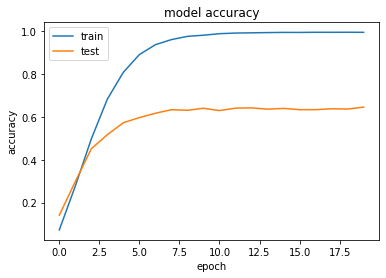

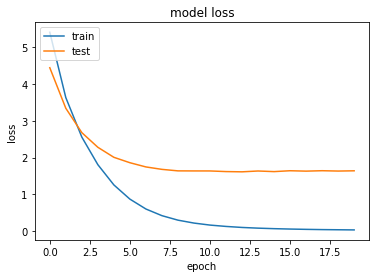

In [ ]:
history2(history)

In [ ]:
confussion_mat(model)

##RNN

In [ ]:
import numpy as np

# import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()